<center>![](logo.jpg)</center>


# Ejemplo completo de árbol de decisión con sklearn

## Importación de las librería necesarias

* sklearn: https://scikit-learn.org/stable/ Machine Learning in Python
* pandas: https://pandas.pydata.org/ Python Data Analysis Library
* csv: https://realpython.com/python-csv/ Reading and Writing CSV Files in Python
* pydotplus: https://pypi.org/project/pydotplus/ Python Interface to Graphviz’s Dot language
    Se debe instalar https://www.graphviz.org/ y actualizar Anaconda
* matplotlib: https://matplotlib.org/  Python 2D plotting library


In [2]:
import sklearn.datasets as datasets
import pandas as pd
import random
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


## Leer archivo csv (Play Tennis)

Recorre todas las filas del archivo csvfile y lo deja en lista a, en donde cada fila es una lista 

In [3]:
a = []
print("\n The Given Training Data Set \n")

with open('ws.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        a.append (row)  



 The Given Training Data Set 



## Define los valores posibles de los atributos

Son 4 variables categóricas y la longitud del input es 14

In [4]:
attributes = [['sunny','rain','overcast'],
              ['cool','mild','hot'],
              ['normal','high'],
              ['strong','weak']]
print(len(a))
num_attributes = len(attributes)
print(num_attributes)
a


14
4


[['sunny', 'hot', 'high', 'weak', 'no'],
 ['sunny', 'hot', 'high', 'strong', 'no'],
 ['overcast', 'hot', 'high', 'weak', 'yes'],
 ['rain', 'mild', 'high', 'weak', 'yes'],
 ['rain', 'cool', 'normal', 'weak', 'yes'],
 ['rain', 'cool', 'normal', 'strong', 'no'],
 ['overcast', 'cool', 'normal', 'strong', 'yes'],
 ['sunny', 'mild', 'high', 'weak', 'no'],
 ['sunny', 'cool', 'normal', 'weak', 'yes'],
 ['rain', 'mild', 'normal', 'weak', 'yes'],
 ['sunny', 'mild', 'normal', 'strong', 'yes'],
 ['overcast', 'mild', 'high', 'strong', 'yes'],
 ['overcast', 'hot', 'normal', 'weak', 'yes'],
 ['rain', 'mild', 'high', 'strong', 'no']]

## Transforma los valores categóricos a numéricas

Se utiliza para eso LabelEncoder, declarando un encoder para cada varoiable categórica, pudiendo en cualquier momento
recuperar el valor originalde cada una.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
Por ejemplo el valor sunny se codifica con un 2

In [5]:
c=[]
cj=[]
y=[]
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le1.fit(attributes[0])
le2.fit(attributes[1])
le3.fit(attributes[2])
le4.fit(attributes[3])
le=[le1, le2, le3, le4]
for i in range(0,len(a)):
    y.append(a[i][num_attributes])
    c1=le1.transform(a[i][0:1])[0]
    c2=le2.transform(a[i][1:2])[0]
    c3=le3.transform(a[i][2:3])[0]
    c4=le4.transform(a[i][3:4])[0]
    c.append([c1,c2, c3, c4])


En c queda la lista transformda, que se convierte a un data frame de pandas para utilizar como input
de train_test_split

In [6]:
df=pd.DataFrame(c)
print(df)
y


    0  1  2  3
0   2  1  0  1
1   2  1  0  0
2   0  1  0  1
3   1  2  0  1
4   1  0  1  1
5   1  0  1  0
6   0  0  1  0
7   2  2  0  1
8   2  0  1  1
9   1  2  1  1
10  2  2  1  0
11  0  2  0  0
12  0  1  1  1
13  1  2  0  0


['no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no']

Se particiona en train y test (train_X tiene los valores de los atributos y train_y los valores de las respuestas 
correspondientes, lo mismo para test)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
train_X, test_X, train_y, test_y = train_test_split(df, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=123)

Se construye el modelo utilziando DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
y con fit se ajusta este modelo al conjunto de entrenamiento (atributos y respuestas)
Se muestran los parámetros por defecto, pero se pueden modificar cualquiera de ellos como se muestra con max_leaf_nodes=10

In [8]:
dtree=DecisionTreeClassifier(max_depth=3, min_samples_split=3)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Con prediction calculo mi modelo con el conjunto de test de manera de medir qué el comportamkiento sonbre este conjunto

In [9]:
predictions=dtree.predict(test_X)

Y posteriormente con accuracy veo la bondad de ajuste sobre el test
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [10]:
acc=accuracy_score(test_y, predictions)
acc

0.4

Lo mismo para la matriz de confusón
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [11]:
confusion_matrix(test_y, predictions)


array([[1, 2],
       [1, 1]])

Se grafica el árbol con graphviz

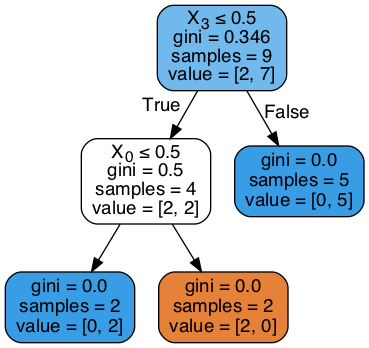

In [12]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Por útltimo se arma la curva ROC

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

Para eso se trasnforma primero tanto 'y' como la salida del modelos con el mismo encoder a valores numéricos y luego se ejecuta roc_curve que deuelve los valores para fpry tpr con los cuales peude ser graficada la curva.

In [13]:
ley = preprocessing.LabelEncoder()
ley.fit(y)
auc=roc_auc_score(ley.transform(test_y), ley.transform(predictions))

fpr, tpr, thresholds = roc_curve(ley.transform(test_y), ley.transform(predictions))

print(thresholds)
print(fpr)
print(tpr)

[2 1 0]
[0.         0.66666667 1.        ]
[0.  0.5 1. ]


Gráfico de la ROC anterior

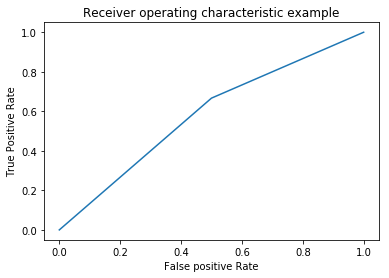

In [14]:
plt.plot(tpr, fpr)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

# ANEXOS

## Usa cross validation y obtiene el accuracy promedio 
https://scikit-learn.org/stable/modules/cross_validation.html


In [16]:
from sklearn import preprocessing
import numpy as np;
#lb = preprocessing.LabelBinarizer()
#lb.fit(y)

lb = preprocessing.LabelBinarizer()
y2 = np.array([number[0] for number in lb.fit_transform(y)])
y2

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [17]:
from sklearn.model_selection import cross_val_score

clf=DecisionTreeClassifier(max_leaf_nodes=10)
scores = cross_val_score(clf, df, y2, cv=5, scoring='roc_auc')
scores.mean()

0.7

## Obtiene utilizando optimización basada en búsqueda exhaustiva sobre los hiperparámetros de manera de devolver los que mejor se ajustan

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

En este caso evalúa el parámetros max_depth desde 3 a 20

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=10, scoring='accuracy')
clf.fit(X=df, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)


/Users/jknebel/miniconda3/envs/aprendizaje-automatico-2019/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jknebel/miniconda3/envs/aprendizaje-automatico-2019/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8571428571428571 {'max_depth': 11}


## Imputa valores nulos

En el ejemplo se pone un valor nulo NaN, y se imputa con el más frecuente

In [19]:
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import Imputer
c[2][2]=np.nan
df=pd.DataFrame(c)
print(df)
imputer=Imputer(missing_values='NaN', strategy='most_frequent')
transformed_values = imputer.fit_transform(df.values)
df=pd.DataFrame(transformed_values )
df

    0  1    2  3
0   2  1  0.0  1
1   2  1  0.0  0
2   0  1  NaN  1
3   1  2  0.0  1
4   1  0  1.0  1
5   1  0  1.0  0
6   0  0  1.0  0
7   2  2  0.0  1
8   2  0  1.0  1
9   1  2  1.0  1
10  2  2  1.0  0
11  0  2  0.0  0
12  0  1  1.0  1
13  1  2  0.0  0


/Users/jknebel/miniconda3/envs/aprendizaje-automatico-2019/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,0,1,2,3
0,2.0,1.0,0.0,1.0
1,2.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0
3,1.0,2.0,0.0,1.0
4,1.0,0.0,1.0,1.0
5,1.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0
7,2.0,2.0,0.0,1.0
8,2.0,0.0,1.0,1.0
9,1.0,2.0,1.0,1.0


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
print(df[0],(y != y_pred).sum())

NameError: name 'y_pred' is not defined